# Hotel Recommendation System

In [2]:
import numpy as np
import pandas as pd
import ast

import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
import re
from nltk.tokenize import word_tokenize


In [98]:
df = pd.read_csv('Hotel_data.csv')
df.head()

,Title,Price,Location,Offer,Rating,Review,No_of_ratings,Discount,Special,City,From_Date,To_Date
0,Fortune Select JP Cosmos - Member ITC Hotel Group,"₹ 3,188",Vasanth Nagar | 4.2 km from Kempegowda Bus Sta...,NaN,3.9,(Good),2384.0,15%,"['Lounge', 'Butler Services', 'Free Parking']",Bangalore,9-8-2021,11-8-2021
1,Vividus,"₹ 4,133",Gandhi Nagar | 2.0 km from Kempegowda Bus Station,Exclusive Offer - HDFC Credit Card Users. Get ...,4.4,(Very Good),676.0,36%,"['Free Parking', 'Business Centre', 'Conferenc...",Bangalore,9-8-2021,11-8-2021
2,Bannerghatta Nature Camp by Jungle Lodges,"₹ 5,253",NaN,Exclusive Offer - HDFC Credit Card Users. Get ...,4.7,(Excellent),48.0,14%,"['Kitchenette', 'Outdoor Sports', 'Lawn']",Bangalore,9-8-2021,11-8-2021
3,Starlit Suites,"₹ 2,094",Bommasandra,Exclusive Offer - HDFC Credit Card Users. Get ...,4.2,(Very Good),362.0,25%,"['Lounge', 'Free Parking', 'Business Centre']",Bangalore,9-8-2021,11-8-2021
4,The Park Bangalore,"₹ 2,364",Ulsoor,Exclusive Offer - HDFC Credit Card Users. Get ...,4.0,(Very Good),2649.0,32%,"['Lounge', 'Free Parking', 'Business Centre']",Bangalore,9-8-2021,11-8-2021


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8050 entries, 0 to 8049
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          8050 non-null   object 
 1   Price          8050 non-null   object 
 2   Location       8001 non-null   object 
 3   Offer          7347 non-null   object 
 4   Rating         6916 non-null   float64
 5   Review         6115 non-null   object 
 6   No_of_ratings  6916 non-null   float64
 7   Discount       7682 non-null   object 
 8   Special        8050 non-null   object 
 9   City           8050 non-null   object 
 10  From_Date      8050 non-null   object 
 11  To_Date        8050 non-null   object 
dtypes: float64(2), object(10)
memory usage: 754.8+ KB


In [100]:
column_names_list = list(df.columns)
print("Column names (as a list):", column_names_list)

Column names (as a list): ['Title', 'Price', 'Location', 'Offer', 'Rating', 'Review', 'No_of_ratings', 'Discount', 'Special', 'City', 'From_Date', 'To_Date']


In [101]:
df.drop(['From_Date', 'To_Date'], axis=1, inplace=True)

In [102]:
def clean_special(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenize text into words
    tokens = word_tokenize(text)
    # Join the tokens back into a cleaned string
    cleaned_text = ' '.join(tokens)
    return cleaned_text

# Apply the 'clean_special' function to the 'Special' column
df['Special'] = df['Special'].apply(clean_special)

In [103]:
print(df.describe())

            Rating  No_of_ratings
count  6916.000000    6916.000000
mean      3.706564     261.624783
std       0.686277     535.053410
min       1.000000       1.000000
25%       3.300000      17.000000
50%       3.800000      73.000000
75%       4.200000     261.250000
max       5.000000   10005.000000


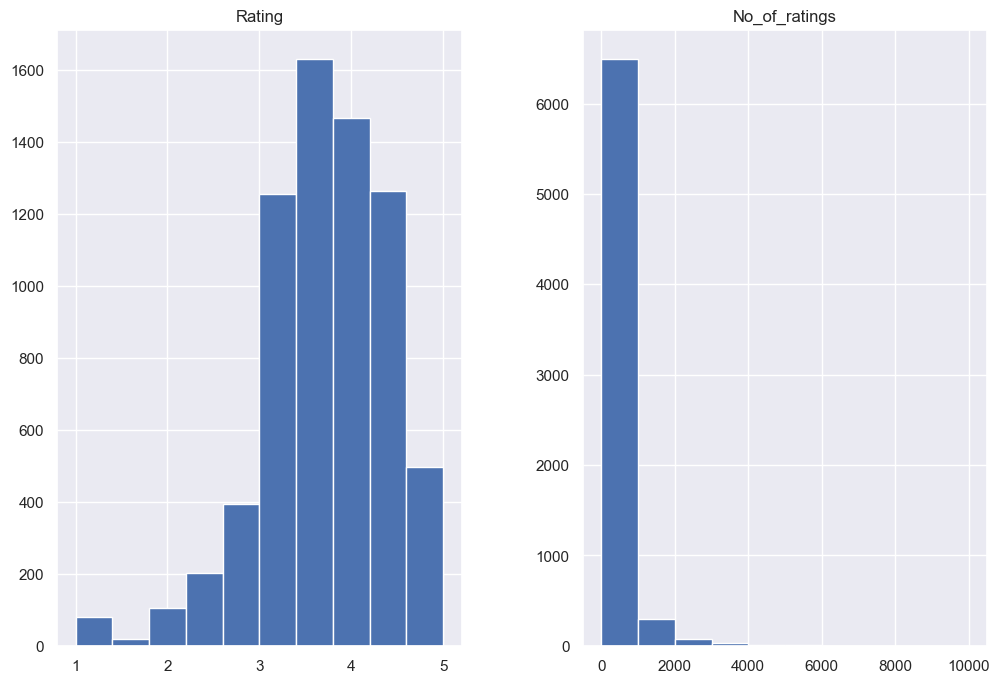

In [104]:
df.hist(figsize=(12, 8))
plt.show()

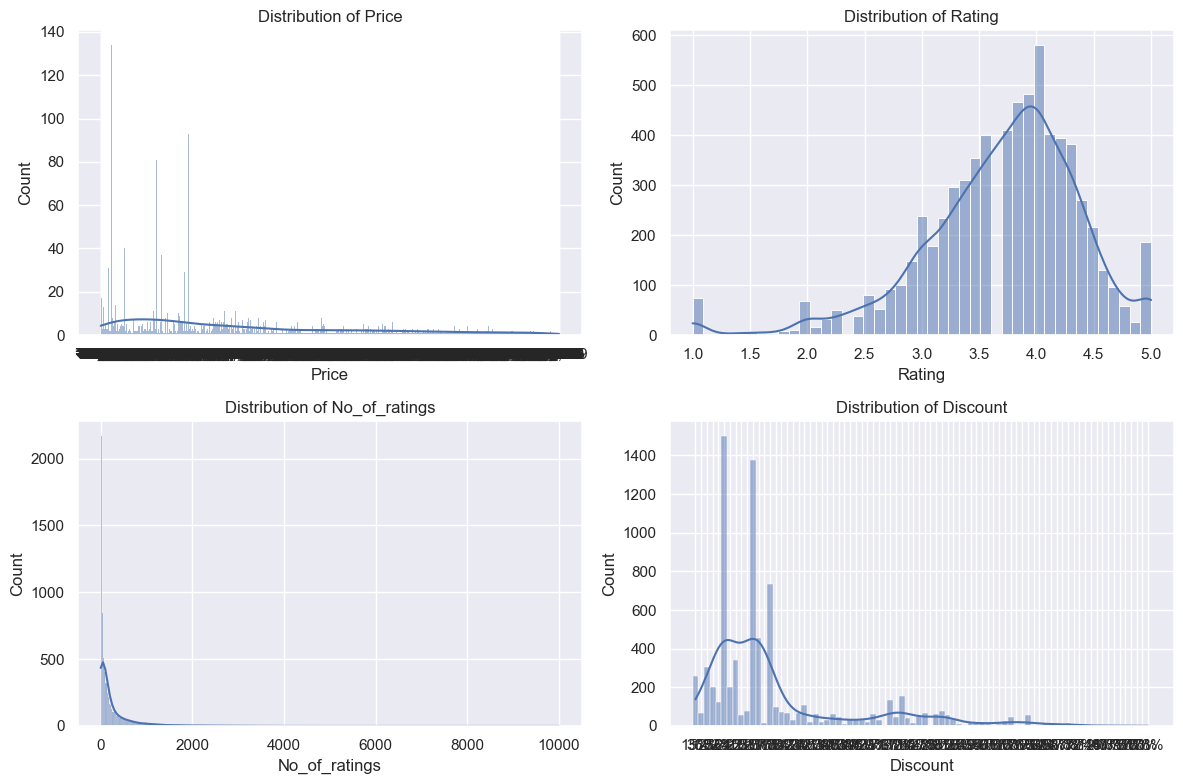

In [105]:
plt.figure(figsize=(12, 8))
for column in ['Price', 'Rating', 'No_of_ratings', 'Discount']:
    plt.subplot(2, 2, list(['Price', 'Rating', 'No_of_ratings', 'Discount']).index(column) + 1)
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

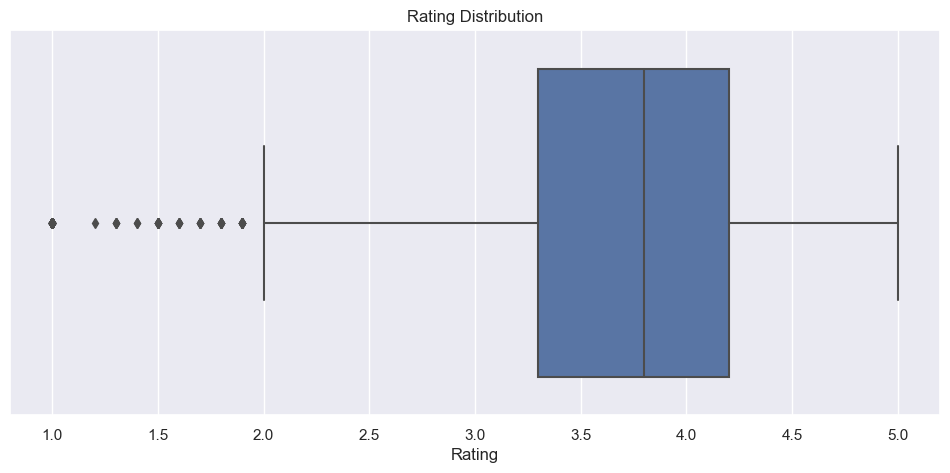

In [106]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='Rating')
plt.title('Rating Distribution')
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


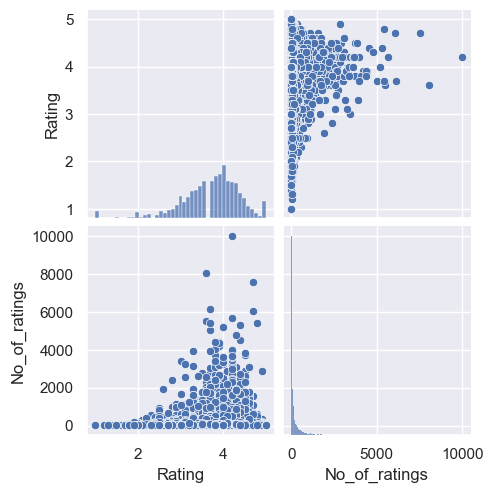

In [107]:
#Pairplot for numerical features
sns.pairplot(df[[ 'Rating', 'No_of_ratings', 'Discount']])
plt.show()


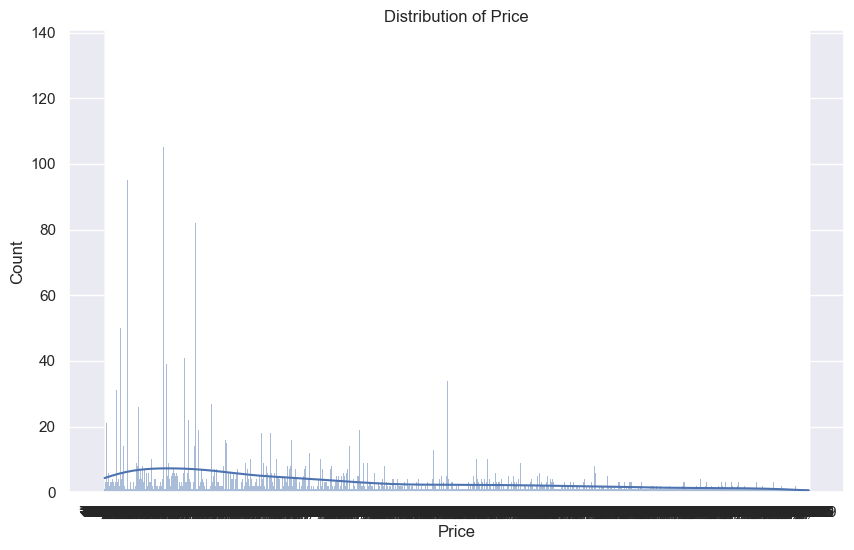

In [108]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.show()

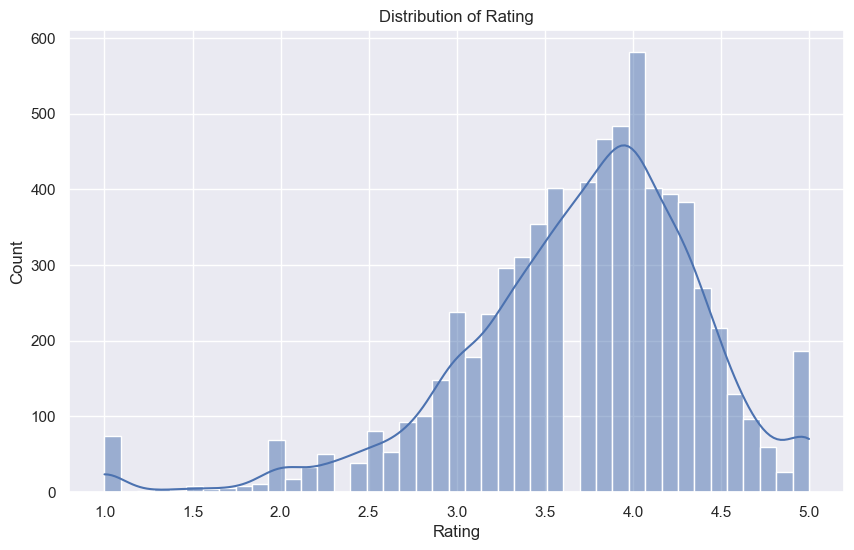

In [109]:
# Distribution of Rating
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], kde=True)
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.show()

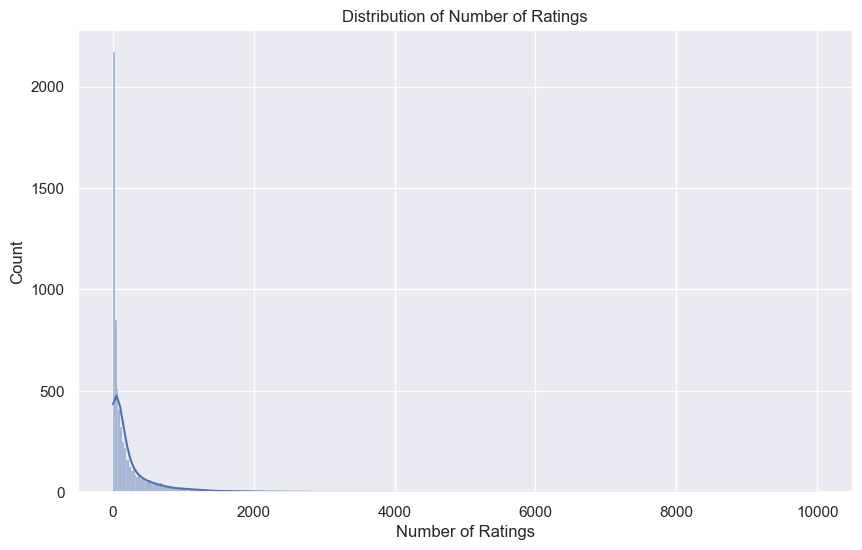

In [95]:
# Distribution of Number of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['No_of_ratings'], kde=True)
plt.title('Distribution of Number of Ratings')
plt.xlabel('Number of Ratings')
plt.show()


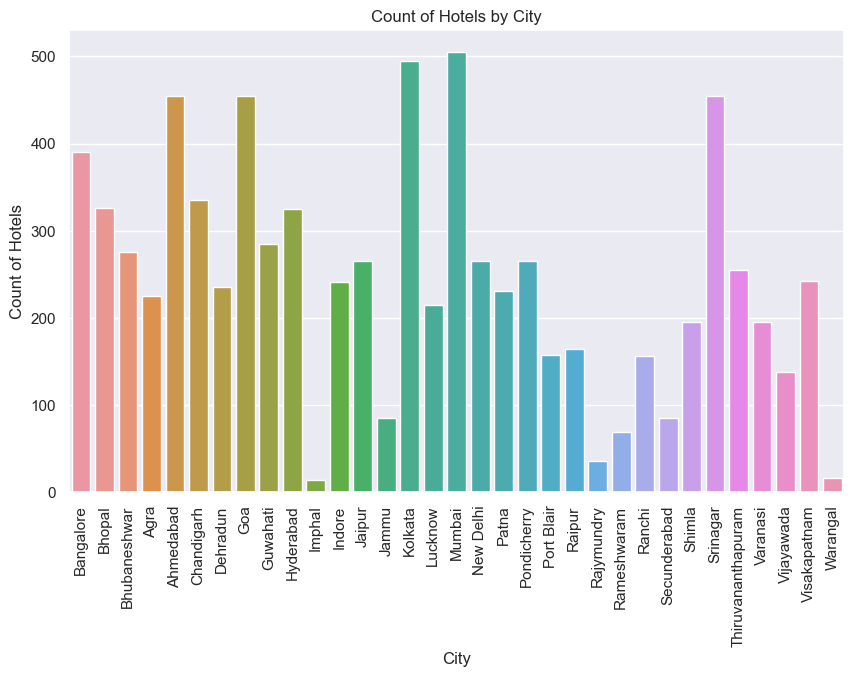

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is 'df' and you want to count hotels by city
sns.set(style="darkgrid")

# Create the countplot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.countplot(data=df, x='City')

# Set labels and title
plt.xlabel("City")
plt.ylabel("Count of Hotels")
plt.title("Count of Hotels by City")

# Show the plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

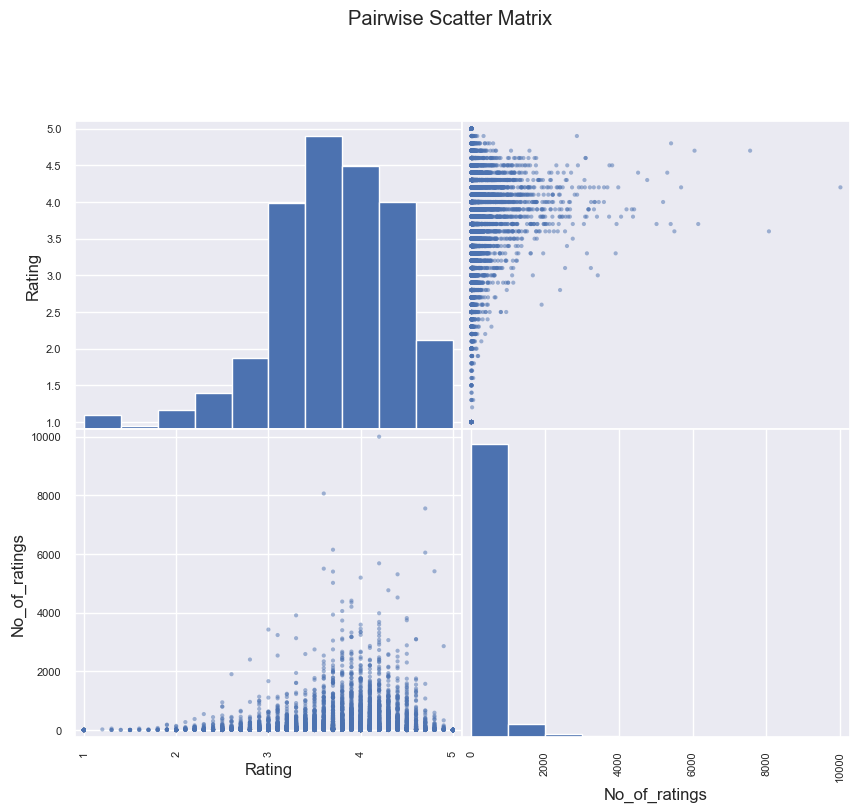

In [112]:
# Pairwise Scatter Matrix
pd.plotting.scatter_matrix(df[['Price', 'Rating', 'No_of_ratings']], figsize=(10, 8))
plt.suptitle('Pairwise Scatter Matrix', y=1.02)
plt.show()

In [113]:
df['Price'] = df['Price'].astype(str)

In [114]:
df['Price'] = df['Price'].str.replace('₹', '').str.replace(',', '').astype(float)

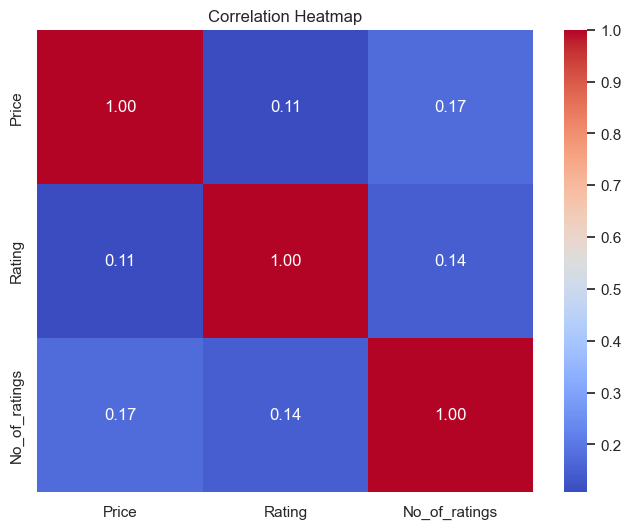

In [115]:
# Correlation heatmap for numerical columns
correlation_matrix = df[['Price', 'Rating', 'No_of_ratings']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [116]:
!pip install wordcloud

In [117]:
from wordcloud import WordCloud

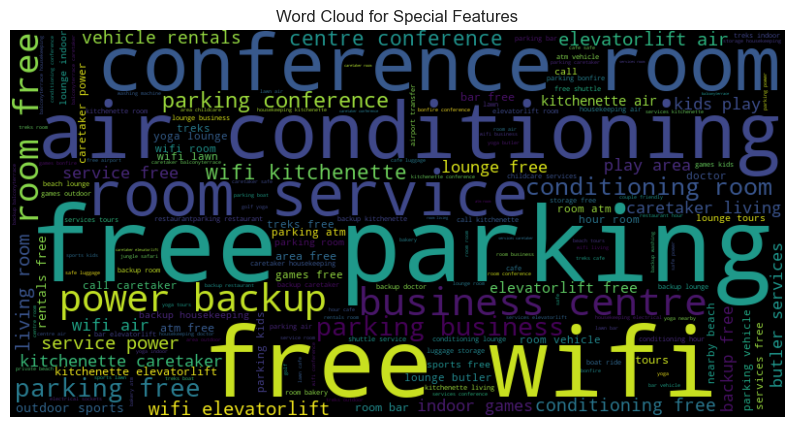

In [118]:
# Word Cloud for Special Features
from wordcloud import WordCloud
special_features = " ".join(df['Special'].dropna())
wordcloud = WordCloud(width=800, height=400).generate(special_features)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Special Features')
plt.show()

In [119]:
print(df[~df['Discount'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]['Discount'].unique())


['15%' '36%' '14%' '25%' '32%' '6%' '24%' '11%' '22%' nan '33%' '51%'
 '20%' '57%' '16%' '18%' '30%' '34%' '12%' '23%' '28%' '42%' '41%' '53%'
 '39%' '40%' '48%' '63%' '38%' '49%' '45%' '43%' '29%' '5%' '71%' '19%'
 '37%' '10%' '21%' '60%' '44%' '27%' '8%' '26%' '35%' '31%' '52%' '56%'
 '64%' '55%' '9%' '54%' '50%' '67%' '66%' '58%' '13%' '68%' '76%' '17%'
 '65%' '69%' '62%' '46%' '59%' '47%' '7%' '3%' '72%' '81%' '74%' '2%' '4%'
 '61%' '77%' '89%' '73%' '86%' '70%' '80%' '78%']


In [120]:
df['Discount'] = df['Discount'].apply(lambda x: float(x) if str(x).replace('.', '', 1).isdigit() else 0.0)


In [131]:
def city_ratings(city, min_no_of_ratings=10, min_price=0,max_price=99999,offer=False,sorting=['Rating']):
    data = df.copy()
    city = city.lower()
    data['City'] = data['City'].str.lower()
    if offer:
        data = data.dropna(subset='Offer')
        data['Discounted_Price'] = np.round(data['Price'] - data['Price']*data['Discount'],0)
    return data.loc[(data['City'] == city) & (data['No_of_ratings'] >= min_no_of_ratings)\
                    & (data['Price'] >= min_price) & (data['Price'] <= max_price)].\
                    sort_values(by=sorting,ascending=False).head().drop(['City'],axis=1)

city_ratings('Mumbai',10,500,2000,True,['Rating','Price'])

,Title,Price,Location,Offer,Rating,Review,No_of_ratings,Discount,Special,Discounted_Price
4853,Hotel Lucky Bandra,1767.0,"Bandra West, Mumbai | 300 m from Bandra Bus Stop",Exclusive Offer - HDFC Credit Card Users. Get ...,4.8,(Excellent),124.0,0.0,free wifi elevatorlift air conditioning,1767.0
5107,Vishal Hall,1139.0,"Vile Parle, Mumbai | 340 m from Weh Metro Station",Exclusive Offer - HDFC Credit Card Users. Get ...,4.7,(Excellent),69.0,0.0,free parking conference room atm,1139.0
4772,Hotel Maharana Inn Chembur,1648.0,"Chembur, Mumbai | 760 m from Chembur Colony",Exclusive Offer - HDFC Credit Card Users. Get ...,4.6,(Excellent),56.0,0.0,free parking conference room vehicle rentals,1648.0
4727,Hotel Bawa Continental,1598.0,"Vile Parle, Mumbai | 530 m from Juhu Beach Bus...",Exclusive Offer - HDFC Credit Card Users. Get ...,4.6,(Excellent),107.0,0.0,free parking cafe elevatorlift,1598.0
4874,Make My Day,1363.0,"Belapur CBD, Navi Mumbai",Exclusive Offer - HDFC Credit Card Users. Get ...,4.6,(Excellent),141.0,0.0,free parking free wifi kitchenette,1363.0


In [122]:
def text_preprocess(text):
    tokens = word_tokenize(text)
    tokens_lemmatized = [wordnet_lemmatizer.lemmatize(w) for w in tokens if not w.lower() in stop_words]
    return set(tokens_lemmatized)

def intersection_length(text,se):
    text_tokens = text_preprocess(text)
    length = len(text_tokens.intersection(se))
    return length
    
def requirements_recommender(city, requirements):
    data = df.copy()
    city = city.lower()
    data['City'] = data['City'].str.lower()
    data = data.loc[data['City'] == city]
    requirements_tokens = text_preprocess(requirements)
    data['Recommendation_Requirements'] = data['Special'].apply(intersection_length,args=(requirements_tokens,))
    return data.sort_values(by='Recommendation_Requirements',ascending=False).\
           head().drop(['City','Recommendation_Requirements'],axis=1)

requirements_recommender('Mumbai','I need Free Parking, a Conference Room and an AC')

,Title,Price,Location,Offer,Rating,Review,No_of_ratings,Discount,Special
4621,The Lalit Mumbai,3948.0,"Near Mumbai Airport, Mumbai | 710 m from Sahar...",Exclusive Offer - HDFC Credit Card Users. Get ...,3.9,(Good),3180.0,0.0,lounge butler services free parking
4953,Hotel Juhu Residency Boutique,5709.0,"Vile Parle, Mumbai | 580 m from Juhu Beach Bus...",Exclusive Offer - HDFC Credit Card Users. Get ...,3.2,(Good),168.0,0.0,free parking business centre bakery
4966,Kohinoor ATC,3290.0,"South Mumbai, Mumbai | 680 m from Veer Kotwal ...",Exclusive Offer - HDFC Credit Card Users. Get ...,3.6,(Good),49.0,0.0,caretaker free wifi free parking
4965,Anantha Executive Suites,3128.0,"Kanjurmarg West, Mumbai | 880 m from Kanjur Ma...",Exclusive Offer - HDFC Credit Card Users. Get ...,2.9,NaN,125.0,0.0,free parking conference room bar
4964,Hotel Lal Sai Residency,2170.0,"Andheri West, Mumbai | 90 m from Samarth Nagar...",Exclusive Offer - HDFC Credit Card Users. Get ...,3.3,(Good),27.0,0.0,yoga nearby beach lounge


In [123]:
def city_ratings_requirements(city,requirements,min_no_of_ratings=10, min_price=0,\
                              max_price=99999,offer=False,sorting=['Rating',]):
    data = df.copy()
    city = city.lower()
    data['City'] = data['City'].str.lower()
    if offer:
        data = data.dropna(subset='Offer')
        data['Discounted_Price'] = np.round(data['Price'] - data['Price']*data['Discount'],0)
    data = data.loc[(data['City'] == city) & (data['No_of_ratings'] >= min_no_of_ratings)\
                    & (data['Price'] >= min_price) & (data['Price'] <= max_price)]
    requirements_tokens = text_preprocess(requirements)
    data['Recommendation_Requirements'] = data['Special'].apply(intersection_length,args=(requirements_tokens,))
    sorting.insert(0,'Recommendation_Requirements')
    return data.sort_values(by=sorting,ascending=False).\
           head().drop(['Recommendation_Requirements','City'],axis=1)

city_ratings_requirements('Mumbai','I need Free Parking, an AC, and a conference room',offer=True)

,Title,Price,Location,Offer,Rating,Review,No_of_ratings,Discount,Special,Discounted_Price
5107,Vishal Hall,1139.0,"Vile Parle, Mumbai | 340 m from Weh Metro Station",Exclusive Offer - HDFC Credit Card Users. Get ...,4.7,(Excellent),69.0,0.0,free parking conference room atm,1139.0
4634,Hotel Kohinoor Elite,2689.0,"Near Mumbai Airport, Mumbai | 320 m from Local...",Exclusive Offer - HDFC Credit Card Users. Get ...,4.6,(Excellent),1759.0,0.0,free parking business centre conference room,2689.0
4772,Hotel Maharana Inn Chembur,1648.0,"Chembur, Mumbai | 760 m from Chembur Colony",Exclusive Offer - HDFC Credit Card Users. Get ...,4.6,(Excellent),56.0,0.0,free parking conference room vehicle rentals,1648.0
4927,Hotel Karl Residency,2820.0,"Vile Parle West, Mumbai | 800 m from Andheri B...",Exclusive Offer - HDFC Credit Card Users. Get ...,4.6,(Excellent),45.0,0.0,free parking conference room free wifi,2820.0
5046,Hotel Mourya Residency Pvt Ltd,2110.0,"Thane West, Thane | 320 m from Thane Railway S...",Exclusive Offer - HDFC Credit Card Users. Get ...,4.6,(Excellent),155.0,0.0,free parking conference room bar,2110.0


In [124]:
def city_location_ratings_requirements(city,location,requirements,min_no_of_ratings=10, \
                                       min_price=0,max_price=99999,offer=False,sorting=['Rating',]):
    data = df.copy()
    city = city.lower()
    data['City'] = data['City'].str.lower()
    if offer:
        data = data.dropna(subset='Offer')
        data['Discounted_Price'] = np.round(data['Price'] - data['Price']*data['Discount'],0)
    data = data.loc[(data['City'] == city) & (data['No_of_ratings'] >= min_no_of_ratings)\
                    & (data['Price'] >= min_price) & (data['Price'] <= max_price)]
    location_tokens = text_preprocess(location)
    data['Recommendation_Location'] = data['Location'].apply(intersection_length,args=(location_tokens,))
    requirements_tokens = text_preprocess(requirements)
    sorting = ['Recommendation_Location', 'Recommendation_Requirements'] + sorting
    data['Recommendation_Requirements'] = data['Special'].apply(intersection_length,args=(requirements_tokens,))
    return data.sort_values(by=sorting,ascending=False).head().\
            drop(['Recommendation_Location','Recommendation_Requirements','City'],axis=1)

city_location_ratings_requirements('Mumbai','Dadar','I need a Conference room')

,Title,Price,Location,Offer,Rating,Review,No_of_ratings,Discount,Special
4781,Hotel Avon Ruby,1688.0,"South Mumbai, Mumbai | 210 m from Dadar Railwa...",Exclusive Offer - HDFC Credit Card Users. Get ...,4.3,(Very Good),285.0,0.0,free parking conference room atm
4668,Ramee Guestline Hotel - Dadar,2676.0,"South Mumbai, Mumbai | 50 m from Dadar Railway...",Exclusive Offer - HDFC Credit Card Users. Get ...,3.8,(Good),88.0,0.0,free parking business centre conference room
4730,Hotel Aroma,1520.0,"South Mumbai, Mumbai | 390 m from Dadar Railwa...",Exclusive Offer - HDFC Credit Card Users. Get ...,3.2,(Good),217.0,0.0,free wifi air conditioning room service
4848,City Guest House,1599.0,"South Mumbai, Mumbai | 170 m from Dadar Railwa...",Exclusive Offer - HDFC Credit Card Users. Get ...,3.2,(Good),199.0,0.0,free wifi air conditioning room service
4909,Hotel City Point,1940.0,"South Mumbai, Mumbai | 420 m from Dadar Railwa...",Exclusive Offer - HDFC Credit Card Users. Get ...,3.1,(Good),615.0,0.0,free parking conference room atm
